# ##########################################################################
#                Practicum Project Cleaning 
# ##########################################################################
# Purpose of this workbook:
   1. Load the Results from the Query in Azure Data Studio
   2. Complete some EDA (active user rate, probs of each outcome)
   3. Format the training data set
   4. Potentially create the network graph

In [1]:
import pandas as pd
#from pandas_profiling import ProfileReport
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ###########################################################################
#                  READ Data from Results.csv
# ###########################################################################
def read_raw_data():
    return pd.read_csv('1m_Emails.csv')


raw_data = read_raw_data()
raw_data.head()
print(raw_data['Subject'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 1000000 entries, 0 to 999999
Series name: Subject
Non-Null Count   Dtype 
--------------   ----- 
998400 non-null  object
dtypes: object(1)
memory usage: 7.6+ MB
None


# Join Other Values That I couldn't get from Production
1. Join the user info


In [3]:
# ###########################################################################
#                  READ Data from Users.csv
# ###########################################################################
def read_raw_data():
    return pd.read_csv('DIMN_USERS.csv')

user_cols = ['EMAIL_ADDRESS','CREATED_AT','USER_PROFILE_PERMA_KEY','TENANT_PERMA_KEY']
user_data = read_raw_data()
user_data.head()
user_data = user_data[user_cols]

raw_data_w_users = pd.merge(left= raw_data, right= user_data, how='inner', left_on=['UserProfilePermaKey'], right_on=['USER_PROFILE_PERMA_KEY'] )

raw_data_w_users.head()

,EmailMessageId,EmailConversationId,EmailMessagePermaKey,TenantPermaKey,DateReceived,Subject,AuthorPermaKey,AuthorRawEmailAddress,UserProfilePermaKey,ToField,...,Read_and_Cleared,Replied,Forwarded,Assigned_To_Work,Assigned_To_User,Assinged_to_my_week,EMAIL_ADDRESS,CREATED_AT,USER_PROFILE_PERMA_KEY,TENANT_PERMA_KEY
0,378005828,285426768,2nvzGkVtTFml,1CpBNhwgg4fl,2023-01-03 02:31:28,NFL game suspended as CPR performed after play...,NaN,newsletter@e.foxsports.com.au,3FQmm1yTsT8d,darren@dardee.com.au,...,0,0,0,0,0,0,darren@dardee.com.au,2015-12-14T00:34:37Z,3FQmm1yTsT8d,1CpBNhwgg4fl
1,378912419,286129217,nwvDg8g5jk4,1CpBNhwgg4fl,2023-01-05 03:49:24,Unable to complete the execution of scenario P...,2TkkWRshD8PB,noreply@integromat.com,3FQmm1yTsT8d,integromat@dardee.com.au,...,0,0,0,0,0,0,darren@dardee.com.au,2015-12-14T00:34:37Z,3FQmm1yTsT8d,1CpBNhwgg4fl
2,379286682,286419556,4gtzZFGk1jxC,1CpBNhwgg4fl,2023-01-06 00:19:18,FW: Project consultant expenses as income? [SE...,NaN,notifications@tasks.clickup.com,3FQmm1yTsT8d,darren@dardee.com.au,...,0,0,0,0,0,0,darren@dardee.com.au,2015-12-14T00:34:37Z,3FQmm1yTsT8d,1CpBNhwgg4fl
3,379028480,286227028,sZ429tLdNSd,1CpBNhwgg4fl,2023-01-05 14:00:09,⭐ Equilibrium’s 2022: Year in Review,NaN,contact@equilibrium.io,3FQmm1yTsT8d,investments@scodar.com.au,...,0,0,0,0,0,0,darren@dardee.com.au,2015-12-14T00:34:37Z,3FQmm1yTsT8d,1CpBNhwgg4fl
4,377744449,285192158,49lZbYrbGfsV,1CpBNhwgg4fl,2023-01-01 14:23:36,BUZZ ROTHFIELD Tweeted: Great story,NaN,info@twitter.com,3FQmm1yTsT8d,"""Darren McMahon"" <darren@dardee.com.au>",...,0,0,0,0,0,0,darren@dardee.com.au,2015-12-14T00:34:37Z,3FQmm1yTsT8d,1CpBNhwgg4fl


In [4]:
###################################################################
#                  Probability of Each Action
###################################################################
def plot_bar(df, cols, title, xlab, ylab):
    plt.bar(cols, df[cols].sum(axis=0)/len(df.index), )
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.xticks(rotation=45, ha='right')
    plt.show()



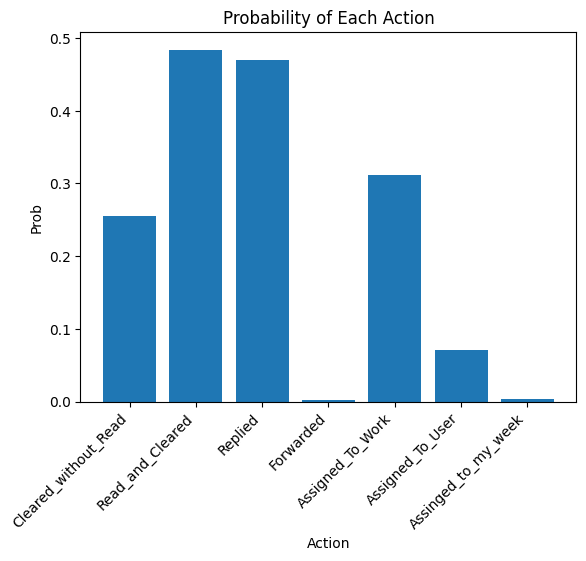

In [5]:
#raw_data.iloc[:-7].columns
cols=['Cleared_without_Read',
       'Read_and_Cleared', 'Replied', 'Forwarded', 'Assigned_To_Work',
       'Assigned_To_User', 'Assinged_to_my_week']
plot_bar(raw_data, cols, "Probability of Each Action", ylab="Prob", xlab="Action")


Actions with low stats:
- Assign to my week
- Forwarded
- Assigned to user is also low. 

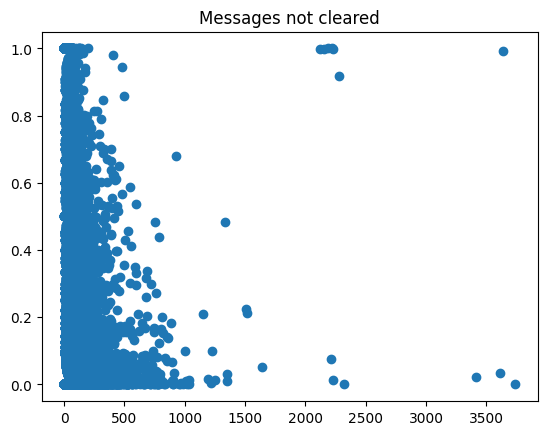

/var/folders/s8/c9hzcmhx1dg56hzbqqy1mk3h0000gn/T/ipykernel_83649/2232214284.py:98: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Multiple_Actions'] = df[cols].sum(axis=1)


,Num_Messages,Num_Msg_No_Clear,Num_Msg_No_Clear_w_Action,Percent_Msg_No_Clear,Percent_Msg_No_Clear_w_Action
UserProfilePermaKey,,,,,
194fZdMwyf7G,92,21,17,0.228261,0.184783
1C1RDJMC3bk5,102,25,25,0.245098,0.245098
1Ct6fzYbm75v,437,10,4,0.022883,0.009153
1GvqhXTSZHZ6,4,4,4,1.000000,1.000000
1JNcyZrx7Sx,359,17,1,0.047354,0.002786
...,...,...,...,...,...
zvRDznJDB7V,92,41,39,0.445652,0.423913
zvckMQls6CZ,92,0,0,0.000000,0.000000
zx5gZxMWDkd,75,22,19,0.293333,0.253333


In [6]:
# ###########################################################################
#                           ACTIVE USERS
#############################################################################
# GOAL: Create a probability of each action vs the number of emails with an action

# DEFINITION: Hard to understand what an active user is
#               Karbon does not date stamp actions
#               Active = the number of actions completed on emails 
     
def prob_of_action_vs_percent_usage(df: pd.DataFrame, cols: list) -> pd.DataFrame:
        # Group by person and get sum of each action
        # Divide sum by number of emails per person -> prob per user
        # Plot scatter plot of prob per user per action
        
        # Get the prob of each action by user
        df_action_count = df[cols].groupby(['UserProfilePermaKey']).sum() # TODO: need to be updated to user address
        df_user_messages = df.groupby('UserProfilePermaKey')['EmailMessageId'].count().reset_index(name='Count').set_index('UserProfilePermaKey')
        df_action_count = df_action_count.join(df_user_messages, how='left', rsuffix='right')
        df_action_count = df_action_count[['Cleared_without_Read',
                                                'Read_and_Cleared', 'Replied', 'Forwarded', 'Assigned_To_Work',
                                                'Assigned_To_User', 'Assinged_to_my_week']].div(df_action_count.Count, axis=0)
        
        
        # Print the output
        df_action_count = df_action_count.join(df_user_messages, how='left', rsuffix='right')
        df_action_count = df_action_count.sort_values('Count')
        df_action_count.plot(kind='line', x='Count', xlabel='Count of Messages')

        # TODO: 
        #       1. Group users into buckets so the graph is less noisy

        return df_action_count

def check_email_messages_with_multiple_actions(df: pd.DataFrame, cols: list) -> pd.DataFrame:
        # Return a DF where there are multiple actions per message or no actions

        df = df[cols].copy()
        df.set_index('UserProfilePermaKey')
        df['Count_Actions'] = df.sum(axis=1)
        df = df[(df['Count_Actions'] > 1)]
        ind = ['Cleared_without_Read',	'Read_and_Cleared',	'Replied',	'Forwarded',	'Assigned_To_Work',	'Assigned_To_User',	'Assinged_to_my_week']
        table = pd.pivot_table(df, values='UserProfilePermaKey', index=ind,
                    columns=['Count_Actions'], aggfunc='count')
        table.to_csv("Multi_Actions_Analysis.csv")
        return table

def check_email_messages_with_no_actions(df: pd.DataFrame, cols: list) -> pd.DataFrame:
        # Return a DF where there are no actions per message or no actions

        df = df[cols].copy()
        df.set_index('UserProfilePermaKey')
        df['Count_Actions'] = df.sum(axis=1)
        df = df[(df['Count_Actions'] == 0)]

        return df

def check_validity_of_actions(df: pd.DataFrame, cols: list) -> pd.DataFrame:
        # Check if a message is read without clear and read and cleared
        # Check how many actions are completed together
        
        ################### Check read/clear - Where its both read and not read ####################
        df['Read_Clear_Check'] = np.where((df['Read_and_Cleared'] == 1) & (df['Cleared_without_Read'] == 1), 1, 0)
        #df_clean = df[df['Read_Clear_Check'] == 1] # output of bad messages
        #df_clean = df[df['Read_Clear_Check'] == 0] # output of good messages

        ################### Check read/clear - Where its not cleared ####################
        df['Read_Clear_Check_'] = np.where((df['Read_and_Cleared'] == 0) & (df['Cleared_without_Read'] == 0), 1, 0)
        #df_clean = df[df['Read_Clear_Check_'] == 1] # output of bad messages
        #df_clean = df[df['Read_Clear_Check_'] == 0] # output of good messages
        
        ################### Check if messaged without clear and valid actions ####################
        # Check if the user cleared the email and completed any other action
        df['Messages_Clear_Check'] = np.where(((df['Read_and_Cleared'] == 0) & (df['Cleared_without_Read'] == 0)) & ((df['Replied'] == 1) |
                                                                                                            (df['Forwarded'] == 1) |
                                                                                                            (df['Assigned_To_Work'] == 1) |
                                                                                                            (df['Assigned_To_User'] == 1) |
                                                                                                            (df['Assinged_to_my_week'] == 1)) , 1, 0)
        
        ################## Check if users above don't use triage, or if just messages without it #############
        df_users = df.groupby(['UserProfilePermaKey']).agg(
                                                Num_Messages=pd.NamedAgg(column="EmailMessageId", aggfunc="count"),
                                                Num_Msg_No_Clear=pd.NamedAgg(column='Read_Clear_Check_', aggfunc="sum"),
                                                Num_Msg_No_Clear_w_Action=pd.NamedAgg(column='Messages_Clear_Check', aggfunc="sum")
        )
        
        df_users['Percent_Msg_No_Clear'] = df_users['Num_Msg_No_Clear']/df_users['Num_Messages']
        df_users['Percent_Msg_No_Clear_w_Action'] = df_users['Num_Msg_No_Clear_w_Action']/df_users['Num_Messages']
        # fig, axs = plt.subplots(len(df_users.columns), figsize=(4,10))
        # for n, col in enumerate(df_users.columns):
        #         df_users[col].hist(ax=axs[n],legend=True)

        ########## PLOT the usage by number of messages ###################
        plt.scatter(x= df_users['Num_Messages'], y= df_users['Percent_Msg_No_Clear_w_Action'])
        plt.title('Messages not cleared')
        plt.show()

        ######### Check other actions for multiple actions per message#####
        df['Multiple_Actions'] = df[cols].sum(axis=1)
        df_multi = df[df['Multiple_Actions'] > 1][cols] # output of multi action
        
        # f = plt.figure(figsize=(5, 5))
        # plt.matshow(df_multi.corr(), fignum=f.number)
        # plt.xticks(range(df_multi.select_dtypes(['number']).shape[1]), df_multi.select_dtypes(['number']).columns, fontsize=14, rotation=45)
        # plt.yticks(range(df_multi.select_dtypes(['number']).shape[1]), df_multi.select_dtypes(['number']).columns, fontsize=14)
        # cb = plt.colorbar()
        # cb.ax.tick_params(labelsize=14)
        # plt.title('Correlation Matrix', fontsize=16)

        return df_users


# Columns needed for analysis
cols=['UserProfilePermaKey' ,'Cleared_without_Read',
       'Read_and_Cleared', 'Replied', 'Forwarded', 'Assigned_To_Work',
       'Assigned_To_User', 'Assinged_to_my_week']


#check_email_messages_with_multiple_actions(df= raw_data, cols=cols)
#check_email_messages_with_no_actions(df= raw_data, cols=cols)
#prob_of_action_vs_percent_usage(df= raw_data, cols=cols)
check_validity_of_actions(df=raw_data, cols=cols)


In [7]:
# #################################################################################
#                           DATA CLEANING
# #################################################################################
# 1. Create a variable if cc'd or if bcc'd
# 2. Create variable for number of people in the email message
# 3. Apply encoding for Tenant and Type of Contact
# 4. Impute missing values

# From Above - Active Users
When we have more data, need to explore groupings of actions because the chart isn't very helpful

# From Above - Correlation Matrix
Need to have more data to do this. It probably isn't the best approach but I can't figure out how to create a matrix of sums without doing a for loop TODO: Try this

# From Above - Multiple Actions
Given 9179 of the 10000 emails have multiple actions, we will need to consider changing the structure or assigning a hierarchy to the data
The natural logic is: clear_without_read -> read_and_cleared -> replied/forwarded -> Assign to Something

# KEY LEARNINGS
1. There are users who use triage and those who do not. Therefore, we need to consider users who do and do not use clear
2. It looks like Replied and Forwarded are fairly similar & the other actions are highly correlated. Therefore, just consider the two actions. 
3. There are ~10% of records with no actions - these should be removed
4. The % of users that do not clear messages seems pretty high even after completing actions. 

In [8]:
######################################################################################
#                   LIST TRAINING DATASET COLUMNS
######################################################################################
raw_data.columns
train_cols=['EmailMessageId', 
            'EmailConversationId', 
            'EmailMessagePermaKey',
            'TenantPermaKey', 
            #'DateReceived', 
            #'Subject', 
            'AuthorPermaKey',
            'AuthorRawEmailAddress', 
            'UserProfilePermaKey', 
            'ToField', 
            'ccField',
            'BccField', 
            'EmailParticipantsTypeId', 
            #'PrecedingEmailMessageId',
            'TimeSinceLastEmail', 
            'IsReply',
            'IsForward', 
            'Label']

In [9]:
######################################################################################
#                   FORMAT THE DATA FOR THE TRAINING DATA SET
######################################################################################
# GOAL: Create a dataframe or csv with the final training dataset

# Descirption:
#       1. Impute missing values or drop rows with missing data
#       2. Create the encoding
#               1 - Clear_without_read
#               2 - Read_and_Clear
#               3 - Replied
#               4 - To Work?
#               5 - To User?
#               5 - To MyWeek

def format_action_flags_as_labels(df: pd.DataFrame) -> pd.DataFrame:
    # Create a column for each label using logic so they are unique
    
    label_1 =  df.Cleared_without_Read == 1
    label_2 =  df.Read_and_Cleared == 1
    label_3 =  (df.Replied == 1) | (df.Forwarded == 1)
    label_4 =  (df.Assigned_To_Work == 1) | (df.Assigned_To_User == 1 ) | (df.Assinged_to_my_week == 1)


    df['Label'] = 0
    df.loc[label_1, 'Label'] = 1
    df.loc[label_2, 'Label'] = 2
    df.loc[label_3, 'Label'] = 3
    df.loc[label_4, 'Label'] = 4

    return df

def remove_no_actions(df: pd.DataFrame) -> pd.DataFrame:
    df = df[(df['Label'] != 0)]
    return df

def impute_missing_labels(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

def remove_unwanted_cols(df: pd.DataFrame, cols: list) -> pd.DataFrame:
    return df[cols]

def create_cc_bcc_features(df: pd.DataFrame, cols= ['ToField', 'ccField', 'BccField']) -> pd.DataFrame:
    for col in cols:
        for row in df:
            if df.loc[row, 'AuthorRawEmailAddress'] :
                df.loc[row, col] 
    return

impute_cols = ['TimeSinceLastEmail', 
            'IsReply',
            'IsForward']

df_train = format_action_flags_as_labels(df=raw_data)
df_train = remove_no_actions(df= df_train)
df_train = impute_missing_labels(df= df_train, cols= impute_cols)

#df_train = remove_unwanted_cols(df=df_train, cols=train_cols)

#df_train.to_csv('Training_Data.csv')

/var/folders/s8/c9hzcmhx1dg56hzbqqy1mk3h0000gn/T/ipykernel_83649/1846862453.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(df[col].mean(), inplace=True)


# Additional Feature Engineering
1. Consider adding in active work items
2. Consider adding # emails in convoID
3. Condsider adding adding the graph features
4. Consider adding 

In [10]:
#######################################################################
#                       TD-IDF
#######################################################################
# GOAL: The goal of this section is to identify the key words, calc the TDIDF score for the new features

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = df_train
print(df['Subject'].info())
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

def clean_text(text, sw):
    text = str(text)
    text = text.lower()
    
    text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text) # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")

    text = re.sub(r"http\S+", "",text) #Removing URLs 
    #text = re.sub(r"http", "",text)
    
    html=re.compile(r'<.*?>') 
    
    text = html.sub(r'',text) #Removing html tags
    
    punctuations = '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text = text.replace(p,'') #Removing punctuations
        
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    
    text = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text) #removing stopwords
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text) #Removing emojis
    
    return text

df['Subject'] = df['Subject'].apply(lambda x: clean_text(x, sw))



<class 'pandas.core.series.Series'>
Int64Index: 883026 entries, 1 to 999998
Series name: Subject
Non-Null Count   Dtype 
--------------   ----- 
881893 non-null  object
dtypes: object(1)
memory usage: 13.5+ MB
None


/var/folders/s8/c9hzcmhx1dg56hzbqqy1mk3h0000gn/T/ipykernel_83649/2174616341.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Subject'] = df['Subject'].apply(lambda x: clean_text(x, sw))


In [11]:

#investigate the data
# print(df_train['Subject'].info())
# print(df.loc[0:100,'Subject'].values.astype('U').shape)
# print(df['Subject'])

# intialize the models
tfidf_vectorizer = TfidfVectorizer() 
count_vectorizer = CountVectorizer()
vec = tfidf_vectorizer.fit(df.loc[1:10000,'Subject'].values.astype('U'))
bag_of_words = vec.transform(df.loc[1:10000,'Subject'].values.astype('U'))

doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(bag_of_words)]
feat_names = tfidf_vectorizer.get_feature_names_out()

sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
words_freq

print(df.loc[1:10000,'Subject'].info())
print(bag_of_words.shape)
print(bag_of_words.toarray())

#sample_df = pd.DataFrame(data=wm.toarray(), index=doc_names,columns=feat_names)
#sample_df


<class 'pandas.core.series.Series'>
Int64Index: 7705 entries, 1 to 9999
Series name: Subject
Non-Null Count  Dtype 
--------------  ----- 
7705 non-null   object
dtypes: object(1)
memory usage: 120.4+ KB
None
(7705, 6599)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


<class 'scipy.sparse._csr.csr_matrix'>
df_terms        0         1         2         3         4         5         6     \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000114  0.000077  0.000141  0.000093  0.000268  0.000113  0.000261   
3  0.000000  0.000000  0.000000  0.000000  0.005183  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
9  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       7         8         9     ...      6589      6590     6591      6592  \
0  0.000000  0.000000  0.000000  ...  0.000000 

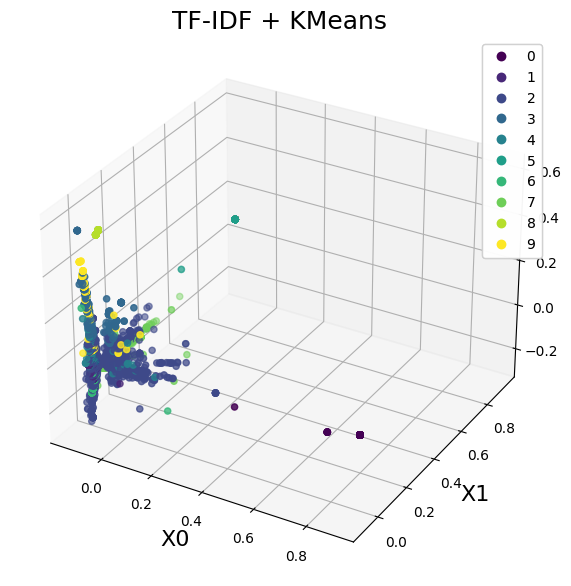

In [35]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
from sklearn.decomposition import PCA
import seaborn as sns

# Set data
X = bag_of_words
print(type(X))
# print(X.shape)

# initialize kmeans with 3 centroids
kmeans = KMeans(init='k-means++', n_clusters=10, random_state=42, n_init=10)
# db_scan = OPTICS(eps=0.01)
# fit the model
kmeans.fit(X)
# db_scan.fit(X.toarray()

# store cluster labels in a variable
clusters = kmeans.labels_
# clusters = db_scan.labels_
df.loc[1:10000,'Cluster'] = clusters

# initialize PCA with 2 components
pca = PCA(n_components=3, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# Check the variance explained
# print('Variance explained by PCA')
# print(pca.explained_variance_ratio_.cumsum())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]
x2 = pca_vecs[:, 2]


def get_top_keywords(n_terms):
    """This function returns the keywords for each centroid of the KMeans"""
    df_terms = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    print('df_terms', df_terms)
    terms = vec.get_feature_names_out() # access tf-idf terms
    for i,r in df_terms.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
    return df_terms

df_terms = get_top_keywords(100)


# Print the subjects in each cluster
# Define a dictionary to store the keywords for each cluster
cluster_keywords = {}

# Iterate over the clusters and collect the keywords
for i in range(5):
    cluster_i = df[df['Cluster'] == i]
    keywords_i = list(cluster_i['Subject'])
    cluster_keywords['Cluster ' + str(i)] = keywords_i

# Print the keywords for each cluster
for cluster, keywords in cluster_keywords.items():
    print(cluster + ': ' + ', '.join(keywords))

df_plot = pd.DataFrame()
df_plot['cluster'] = clusters
df_plot['x0'] = x0
df_plot['x1'] = x1
df_plot['x2'] = x2

# map clusters to appropriate labels 
#cluster_map = {0: "One", 1: "Two", 2: "Three", 3: "four", 4: "five"}
#cluster_map = {0: "One", 1: "Two", 2: "Three", 3: "four", 4: "five"}

# apply mapping
#df_plot['cluster'] = df_plot['cluster'].map(cluster_map)

# set image size
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(projection='3d')
# set a title
ax.set_title("TF-IDF + KMeans", fontdict={"fontsize": 18})
# set axes names
ax.set_xlabel("X0", fontdict={"fontsize": 16})
ax.set_ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
scatter = ax.scatter(df_plot['x0'], df_plot['x1'], df_plot['x2'], c=df_plot['cluster']) #, Colormap=df_plot['cluster'])
legend = ax.legend(*scatter.legend_elements(num=9), loc="upper right")
ax.add_artist(legend)
# sns.scatterplot(data=df_plot, x='x0', y='x1', z='x2', hue='cluster', palette="viridis", legend='full', )
plt.show()


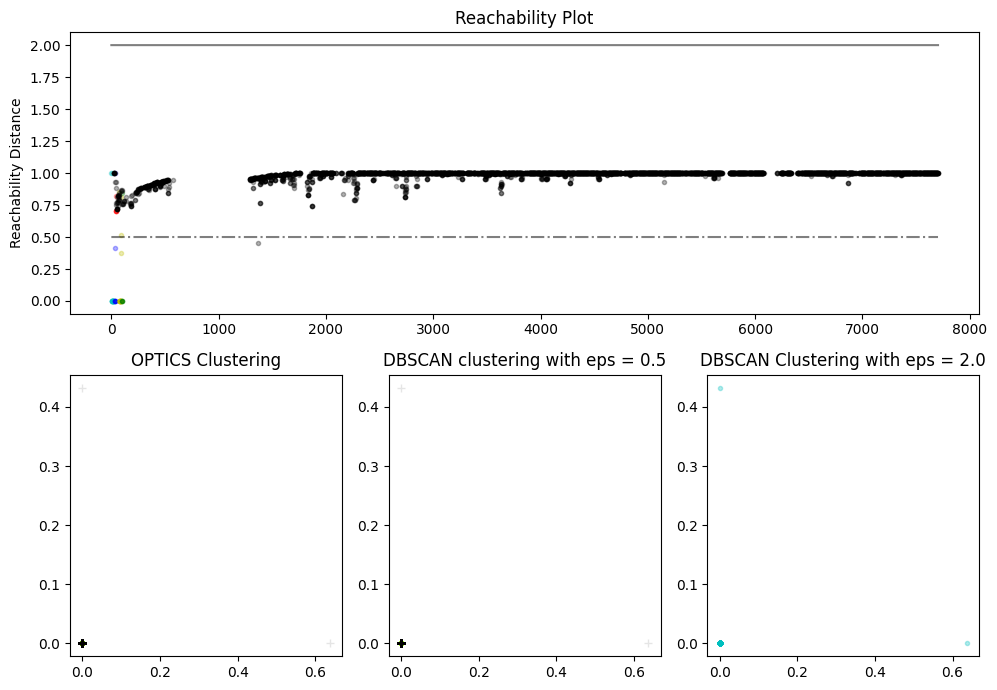

In [185]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS, cluster_optics_dbscan
from matplotlib import gridspec
X_normalized = pd.DataFrame(X.toarray())
# Producing the labels according to the DBSCAN technique with eps = 0.5
labels1 = cluster_optics_dbscan(reachability = db_scan.reachability_,
                                   core_distances = db_scan.core_distances_,
                                   ordering = db_scan.ordering_, eps = 0.5)
 
# Producing the labels according to the DBSCAN technique with eps = 2.0
labels2 = cluster_optics_dbscan(reachability = db_scan.reachability_,
                                   core_distances = db_scan.core_distances_,
                                   ordering = db_scan.ordering_, eps = 2)
 
# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(X_normalized))
 
# Storing the reachability distance of each point
reachability = db_scan.reachability_[db_scan.ordering_]
 
# Storing the cluster labels of each point
labels = db_scan.labels_[db_scan.ordering_]
# Defining the framework of the visualization
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])
 
# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
 
# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
    Xk = X_normalized[db_scan.labels_ == Class]
    ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
     
ax2.plot(X_normalized.iloc[db_scan.labels_ == -1, 0],
        X_normalized.iloc[db_scan.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')
 
# Plotting the DBSCAN Clustering with eps = 0.5
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
    Xk = X_normalized[labels1 == Class]
    ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
       
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
        X_normalized.iloc[labels1 == -1, 1],
       'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')
 
# Plotting the DBSCAN Clustering with eps = 2.0
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
    Xk = X_normalized.iloc[labels2 == Class]
    ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
         
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
        X_normalized.iloc[labels2 == -1, 1],
       'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')
 
 
plt.tight_layout()
plt.show()
